In [1]:
import SimpleITK as sitk
import skimage.io
import numpy as np
import os
import shutil
from PIL import Image
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from scipy import misc
%matplotlib inline 

In [2]:
p = '/backup/yuxin/CBIS-Mass-Patches1024/test/'

In [6]:
for d in os.listdir(p):
    print(d)
    img = cv2.imread(os.path.join(p,d,'images/000000.png'),cv2.IMREAD_ANYDEPTH)
    print(np.max(img)-np.min(img))

Mass-Test_P_01558_RIGHT_MLO
57500
Mass-Test_P_01333_LEFT_MLO
56414
Mass-Test_P_01645_RIGHT_CC
57883
Mass-Test_P_00986_LEFT_MLO
63712
Mass-Test_P_00340_LEFT_CC
56443
Mass-Test_P_01666_RIGHT_MLO
31065
Mass-Test_P_00017_LEFT_CC
39564
Mass-Test_P_01119_LEFT_MLO
21912
Mass-Test_P_00639_LEFT_MLO
48459
Mass-Test_P_00457_LEFT_CC
56394
Mass-Test_P_01741_LEFT_MLO
57244
Mass-Test_P_00969_LEFT_CC
61273
Mass-Test_P_00056_LEFT_MLO
51894
Mass-Test_P_00409_RIGHT_MLO
39934
Mass-Test_P_00623_LEFT_MLO
52863
Mass-Test_P_00671_LEFT_CC
37979
Mass-Test_P_00114_LEFT_MLO
47953
Mass-Test_P_00171_RIGHT_CC
27689
Mass-Test_P_00758_LEFT_MLO
45962
Mass-Test_P_01277_RIGHT_MLO
52092
Mass-Test_P_00296_LEFT_MLO
61449
Mass-Test_P_01183_LEFT_CC
59578
Mass-Test_P_00238_RIGHT_MLO
47293
Mass-Test_P_00707_RIGHT_MLO
52731
Mass-Test_P_00381_LEFT_MLO
53979
Mass-Test_P_00131_LEFT_CC
28116
Mass-Test_P_01502_LEFT_MLO
20806
Mass-Test_P_00481_RIGHT_MLO
54184
Mass-Test_P_01351_LEFT_CC
47210
Mass-Test_P_01347_RIGHT_MLO
47290
Mass-Test_

32690
Mass-Test_P_00510_LEFT_MLO
53942
Mass-Test_P_01623_RIGHT_MLO
35673
Mass-Test_P_00576_LEFT_CC
37034
Mass-Test_P_00116_RIGHT_CC
61207
Mass-Test_P_01489_RIGHT_MLO
32139
Mass-Test_P_01595_LEFT_MLO
33273
Mass-Test_P_01254_RIGHT_MLO
60723
Mass-Test_P_00707_RIGHT_CC
30163
Mass-Test_P_00359_LEFT_MLO
65535
Mass-Test_P_00932_LEFT_MLO
51884
Mass-Test_P_01510_RIGHT_MLO
35820
Mass-Test_P_01551_LEFT_MLO
42839
Mass-Test_P_01110_RIGHT_CC
50413
Mass-Test_P_00738_RIGHT_MLO
35293
Mass-Test_P_00409_RIGHT_CC
48318
Mass-Test_P_00820_LEFT_CC
29106
Mass-Test_P_00837_RIGHT_CC
53186
Mass-Test_P_00533_LEFT_CC
42030
Mass-Test_P_01331_LEFT_MLO
54272
Mass-Test_P_01614_LEFT_MLO
43278
Mass-Test_P_00490_RIGHT_CC
61890
Mass-Test_P_01416_RIGHT_MLO
51652
Mass-Test_P_00601_LEFT_CC
21951
Mass-Test_P_00820_RIGHT_MLO
52973
Mass-Test_P_00457_LEFT_MLO
60355
Mass-Test_P_00173_LEFT_MLO
54580
Mass-Test_P_00820_LEFT_MLO
53171
Mass-Test_P_00198_LEFT_CC
50287
Mass-Test_P_00677_RIGHT_CC
50859
Mass-Test_P_00641_RIGHT_MLO
59314
M

In [27]:
path="/home/xyu/mass_case_description_test_set.csv"

In [29]:
df=pd.read_csv(path)
p=df.loc[[1],["image file path"]]
print(p)
if "Mass-Training_P_00001_LEFT_MLO" in p:
    print(True)

                                     image file path
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...


In [18]:
df

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
5,P_00009,3,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...
6,P_00009,3,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....
7,P_00015,3,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00018,2,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...
9,P_00018,2,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....


In [22]:
os.path.split(str(p))[0]

'                                     image file path\n1  Mass-Training_P_00001_LEFT_MLO'

In [28]:
df=pd.read_csv(path)
pt="/home/xyu/CBIS-Mass-Patches1024/test/"

In [31]:
m=[]
b=[]
for d in os.listdir(pt):
    _, p, p_id, rl, iv=d.split("_")
    for f in os.listdir(os.path.join(pt,d,"masks")):
        x = df[(df['patient_id']=="P_"+p_id)&(df['left or right breast']==rl)&
                    (df['image view']==iv)&(df['abnormality id']==int(f[0]))]['pathology'].values[0]
        y = df[(df['patient_id']=="P_"+p_id)&(df['left or right breast']==rl)&
                    (df['image view']==iv)&(df['abnormality id']==int(f[0]))]['breast_density'].values[0]
    #    if y==2 or y==1:
    m.append(d) if x=="MALIGNANT" else b.append(d)
print(len(m),len(b))

143 217


In [4]:
image_ids=os.listdir(pt)
len(image_ids)

1231

In [31]:
df['breast_density']

0      4
1      4
2      2
3      2
4      3
5      3
6      3
7      3
8      3
9      4
10     4
11     2
12     3
13     2
14     2
15     2
16     2
17     1
18     1
19     3
20     3
21     3
22     1
23     1
24     3
25     3
26     2
27     2
28     3
29     2
      ..
348    3
349    3
350    3
351    1
352    1
353    2
354    2
355    3
356    3
357    2
358    1
359    1
360    3
361    3
362    4
363    4
364    2
365    2
366    4
367    4
368    4
369    3
370    3
371    3
372    2
373    2
374    2
375    2
376    3
377    3
Name: breast_density, Length: 378, dtype: int64

In [27]:
_, p, p_id, rl, iv=image_ids[4].split("_")
x=df[(df['patient_id']=="P_"+p_id)&(df['left or right breast']==rl)&(df['image view']==iv)]['breast_density'].values
print(p_id,rl,iv,x)
df[(df['patient_id']=="P_"+p_id)&(df['left or right breast']==rl)&(df['image view']==iv)]

00969 LEFT CC [3 3]


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
205,P_00969,3,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,3,BENIGN,3,Mass-Test_P_00969_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00969_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00969_LEFT_CC_1/1.3.6.1.4.1.9590.1...
206,P_00969,3,LEFT,CC,3,mass,ARCHITECTURAL_DISTORTION,NaN,4,MALIGNANT,2,Mass-Test_P_00969_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00969_LEFT_CC_3/1.3.6.1.4.1.9590.1...,Mass-Test_P_00969_LEFT_CC_3/1.3.6.1.4.1.9590.1...


In [45]:

p_ids=[]
lr=[]
iv=[]
c=0
for i in image_ids:
    _, p, p_id, rl, iv=i.split("_")
    x=df[(df['patient_id']=="P_"+p_id)&(df['left or right breast']==rl)&(df['image view']==iv)]['breast_density'].values[0]
    class_name = df[(df['patient_id']=="P_"+pt_id)&(df['left or right breast']==lr)&
                    (df['image view']==iv)&(df['abnormality id']==int(f[0]))]['pathology'].values[0]
    if x==3 or x==4:
        print(x)
        c+=1
print(c)
        
        
        

4
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
4
3
3
3
3
4
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
4
3
4
3
4
3
4
3
3
3
3
4
4
3
3
3
4
4
3
3
3
4
3
3
4
4
4
3
4
3
3
4
3
3
4
3
3
3
4
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
4
4
3
4
3
3
3
4
3
3
4
3
3
3
3
4
3
3
3
3
4
3
3
4
3
3
4
3
3
3
3
4
3
3
3
3
4
4
3
4
4
3
3
3
3
3
4
4
3
3
3
3
4
4
3
4
3
3
4
3
3
3
3
4
3
3
3
3
3
3
4
3
3
3
3
3
3
4
3
3
3
3
3
3
3
4
4
3
4
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
4
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
4
3
3
3
4
4
3
3
4
3
4
4
3
4
3
4
3
3
4
3
4
3
3
4
3
3
3
3
3
3
3
4
4
4
4
4
3
3
4
3
3
3
3
4
3
3
3
4
4
3
4
3
3
4
4
4
3
3
3
4
3
3
3
3
3
3
4
3
3
3
3
3
3
4
3
3
3
3
3
3
3
4
3
3
3
3
4
3
3
3
4
3
3
3
3
3
3
3
4
3
4
3
3
3
4
3
3
3
3
3
4
3
4
3
3
3
3
3
3
3
4
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
4
3
3
3
3
3
3
3
4
3
4
3
3
3
4
3
3
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
4
3
3
3
4
3
4
3
3
4
3
3
4
3
435


In [54]:

p_id

'00039'

In [58]:
class_ids=[]

In [82]:
x=df[(df['patient_id']=="P_"+p_id)&(df['left or right breast']==rl)&(df['image view']==iv)&(df['abnormality id']==int("1"))]['pathology'].values
x[0]

'BENIGN'

In [43]:
img = cv2.imread(path, cv2.IMREAD_ANYDEPTH)
print(np.max(img))

51036


In [10]:
print(len(os.listdir(path)))

143


In [48]:
count=0
for r,d,f in os.walk(path):
    for file in f:
        if "._" in file:
            os.remove(os.path.join(r,file))

   
        if file==".DS_Store":
            os.remove(os.path.join(r,file))
        
        
        count+=1
        print(file)

000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
1.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
000000.png
0.png
1.png
2.png
3.png
000000.png
0.png
000000.

In [7]:
im=np.load("/home/xyu/CBIS-Mass/train/Mass-Training_P_00001_LEFT_CC/masks/1000000.dcm")

OSError: Failed to interpret file '/home/xyu/CBIS-Mass/train/Mass-Training_P_00001_LEFT_CC/masks/1000000.dcm' as a pickle

In [46]:
ds=sitk.ReadImage("/home/xyu/CBIS-Mass/train/Mass-Training_P_00009_RIGHT_MLO/masks/1000000.dcm")

In [47]:
img=sitk.GetArrayFromImage(ds)

In [49]:
img.shape

(1, 5266, 2596)

In [54]:
img0=img.transpose(1,2,0)

ValueError: axes don't match array

In [55]:
img0.ndim

2

In [56]:
i=np.sum(img,axis=(0,1))>0
i

True

In [59]:
img=img[:,:,i]

In [60]:
img=np.squeeze(img)
print(img.shape)

(5266, 2596)


In [27]:
img0=np.squeeze(img0)
print(img0.shape)

(4808, 3024)


In [73]:
img.ndim

2

In [74]:
image_rgb = skimage.color.gray2rgb(img)

In [75]:
image_rgb=np.squeeze(image_rgb)

In [90]:
image_rgb.dtype

dtype('uint16')

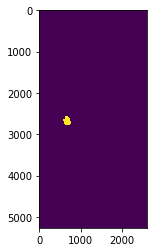

In [61]:
plt.imshow(img)

In [78]:

img=skimage.img_as_ubyte(img)

/home/xyu/.conda/envs/maskrcnn0/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [81]:
img.dtype

dtype('uint8')

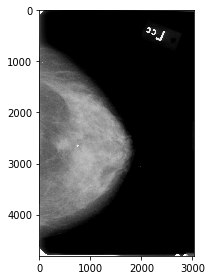

In [80]:
skimage.io.imshow(img)

In [82]:
image_rgb0 = skimage.color.gray2rgb(img)

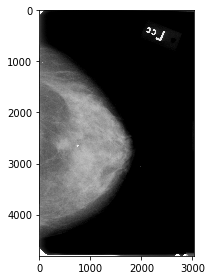

In [83]:
skimage.io.imshow(image_rgb0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


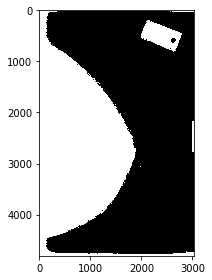

In [84]:
skimage.io.imshow(image_rgb)

In [85]:
img=skimage.color.rgb2gray(image_rgb)

In [91]:
img=skimage.img_as_uint(img)

/home/xyu/.conda/envs/maskrcnn0/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [92]:
img.dtype

dtype('uint16')

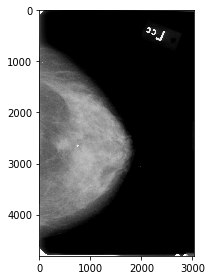

In [93]:
skimage.io.imshow(img)

In [37]:
image_rgb

array([[[65535, 65535, 65535],
        [65535, 65535, 65535],
        [65535, 65535, 65535],
        ...,
        [38904, 38904, 38904],
        [38486, 38486, 38486],
        [37891, 37891, 37891]],

       [[65535, 65535, 65535],
        [65535, 65535, 65535],
        [65535, 65535, 65535],
        ...,
        [38200, 38200, 38200],
        [37847, 37847, 37847],
        [36725, 36725, 36725]],

       [[65535, 65535, 65535],
        [65535, 65535, 65535],
        [65535, 65535, 65535],
        ...,
        [38332, 38332, 38332],
        [38178, 38178, 38178],
        [36989, 36989, 36989]],

       ...,

       [[65535, 65535, 65535],
        [65535, 65535, 65535],
        [65535, 65535, 65535],
        ...,
        [37561, 37561, 37561],
        [37165, 37165, 37165],
        [37033, 37033, 37033]],

       [[65535, 65535, 65535],
        [65535, 65535, 65535],
        [65535, 65535, 65535],
        ...,
        [41568, 41568, 41568],
        [41392, 41392, 41392],
        [41744,

In [8]:
img=np.squeeze(img)
print(img.shape)

(5056, 2761)


In [80]:
img=img.astype(np.bool)
img=np.squeeze(img)
print(np.where(img==True))

(array([2669, 2669, 2669, ..., 3217, 3217, 3217]), array([1821, 1822, 1823, ..., 1868, 1869, 1889]))


In [41]:
img=img.transpose(1,2,0)
print(img.shape)

(5056, 2761, 1)


In [88]:
ds=skimage.io.imread("/home/xyu/nuclei/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png")

In [28]:
import os

In [35]:
print(os.listdir("/home/xyu/CBIS/train/Calc-Training_P_00005_RIGHT_CC/masks"))

['1000000.dcm']


In [30]:
2458*0.3

737.4

In [3]:
path1="/home/xyu/DeepGit/Mask_RCNN/results/breast/submit_20181119T161413/"
path2="/home/xyu/CBIS/test/"

In [ ]:
for iid in os.listdir(path1):
    shutil.copy(os.path.join(path2,iid,"image/000000.dom"),"")